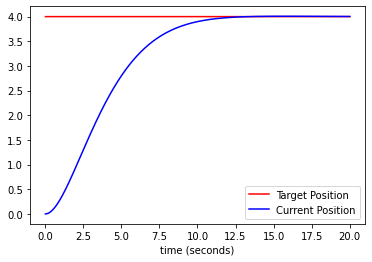

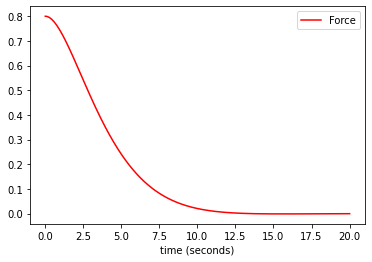

In [3]:
import sys
sys.path.append("../../")

from lib.data.dataplot import *
from lib.system.cart import *
from lib.utils.time import *

class SimplePositionControl:
    
    def __init__(self, _kp):
        self.kp = _kp
        
    def evaluate(self, delta_t, error):
        return self.kp * error
    

dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("target", "Target Position")
dp.add_y("current", "Current Position")

fp = DataPlotter()
fp.set_x("time (seconds)")
fp.add_y("force", "Force")

cart = Cart(1.0, 0.8)

target_position = 4.0
ctrl = SimplePositionControl(0.2)

t = Time()
t.start()

current_position = cart.position

while t.get() < 20:
    
    time.sleep(0.01)
    delta_t = t.elapsed()
    
    error = target_position - current_position
    force = ctrl.evaluate(delta_t, error)
    (current_position, _) = cart.evaluate(delta_t, force)
    
    dp.append_x(t.get())
    dp.append_y("target", target_position)
    dp.append_y("current", current_position)
    
    fp.append_x(t.get())
    fp.append_y("force", force)

dp.plot()
fp.plot()